<a href="https://colab.research.google.com/github/alemorapa/proyecto_ale/blob/main/Miss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alemorapa/proyecto_ale/main/alumnos_proyecto.csv'
df = pd.read_csv(url)

df.head()


,Alumno,Gramática,Listening,Expresión oral,Evaluación final
0,Alumno 1,11,18,8,3
1,Alumno 2,15,17,13,2
2,Alumno 3,18,20,15,4
3,Alumno 4,11,18,8,3
4,Alumno 5,11,11,8,4


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url = 'https://raw.githubusercontent.com/alemorapa/proyecto_ale/main/alumnos_proyecto.csv'
df = pd.read_csv(url)

# Función de recomendación
def recomendar_paquete(row):
    if row['Expresión oral'] < 10:
        if row['Evaluación final'] <= 2:
            return '15 horas (riesgo alto)'
        elif row['Evaluación final'] == 3:
            return '10 horas'
        else:
            return '5 horas'
    low_scores = sum([
        row['Gramática'] < 12,
        row['Listening'] < 12,
        row['Expresión oral'] < 12
    ])
    if row['Evaluación final'] == 0 or low_scores >= 2:
        return '15 horas (riesgo alto)'
    elif row['Evaluación final'] <= 2:
        return '10 horas'
    elif row['Evaluación final'] == 3:
        return '5 horas'
    else:
        return 'No necesita repaso'

# Aplicar evaluación
df['Recomendación'] = df.apply(recomendar_paquete, axis=1)

# Mostrar tabla bonita con colores
def color_recomendacion(val):
    if '15 horas' in val:
        return 'background-color: #ffcccc'
    elif '10 horas' in val:
        return 'background-color: #ffe5b4'
    elif '5 horas' in val:
        return 'background-color: #ffffcc'
    else:
        return 'background-color: #ccffcc'

df_estilizado = df.style.applymap(color_recomendacion, subset=['Recomendación'])
df_estilizado


<ipython-input-13-1f956aa0e92c>:46: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  df_estilizado = df.style.applymap(color_recomendacion, subset=['Recomendación'])


,Alumno,Gramática,Listening,Expresión oral,Evaluación final,Recomendación
0,Alumno 1,11,18,8,3,10 horas
1,Alumno 2,15,17,13,2,10 horas
2,Alumno 3,18,20,15,4,No necesita repaso
3,Alumno 4,11,18,8,3,10 horas
4,Alumno 5,11,11,8,4,5 horas
5,Alumno 6,8,8,9,4,5 horas
6,Alumno 7,11,13,13,2,10 horas
7,Alumno 8,6,6,6,4,5 horas
8,Alumno 9,9,11,6,4,5 horas
9,Alumno 10,17,19,18,0,15 horas (riesgo alto)


<ipython-input-14-bff853ab86fe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Recomendación', order=df['Recomendación'].value_counts().index, palette='viridis')


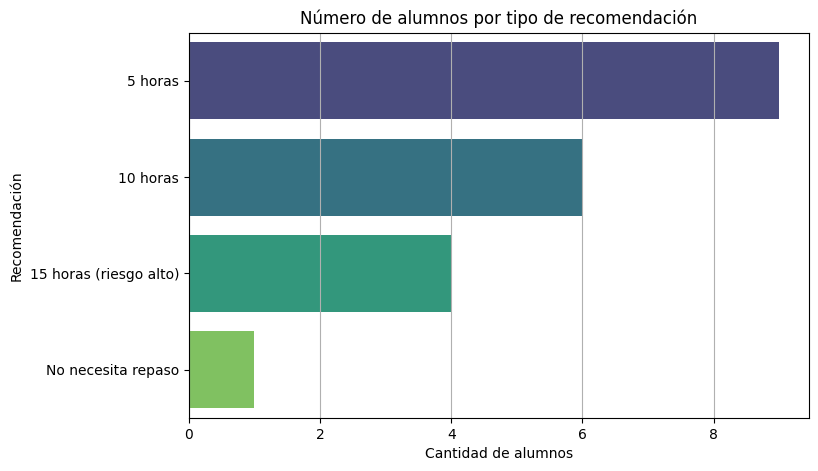

In [14]:
# Gráfico de barras por recomendación
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Recomendación', order=df['Recomendación'].value_counts().index, palette='viridis')
plt.title("Número de alumnos por tipo de recomendación")
plt.xlabel("Cantidad de alumnos")
plt.ylabel("Recomendación")
plt.grid(axis='x')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Codificar la recomendación
le = LabelEncoder()
df['Recomendación_cod'] = le.fit_transform(df['Recomendación'])

# Separar variables predictoras y objetivo
X = df[['Gramática', 'Listening', 'Expresión oral', 'Evaluación final']]
y = df['Recomendación_cod']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar el árbol de decisión
modelo = DecisionTreeClassifier(random_state=0)
modelo.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [18]:
# Predecir con datos de prueba
y_pred = modelo.predict(X_test)


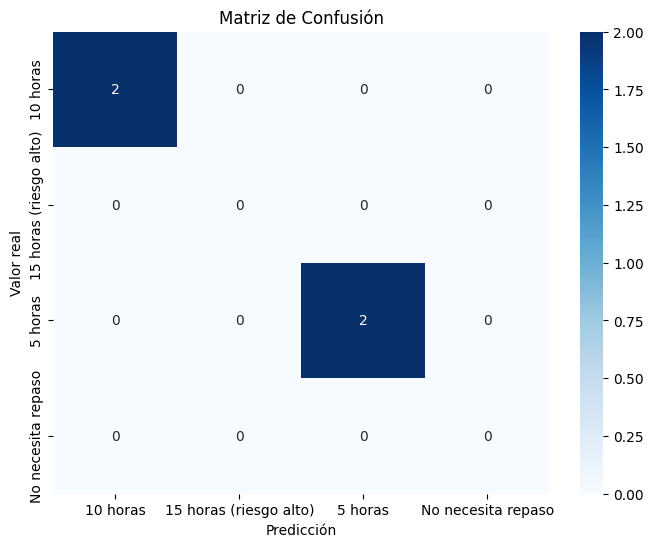

Reporte de clasificación:
                        precision    recall  f1-score   support

              10 horas       1.00      1.00      1.00         2
15 horas (riesgo alto)       0.00      0.00      0.00         0
               5 horas       1.00      1.00      1.00         2
    No necesita repaso       0.00      0.00      0.00         0

              accuracy                           1.00         4
             macro avg       0.50      0.50      0.50         4
          weighted avg       1.00      1.00      1.00         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hacer las predicciones
y_pred = modelo.predict(X_test)

# Obtener las etiquetas originales desde el encoder
labels = list(range(len(le.classes_)))
target_names = le.classes_

# Matriz de confusión con etiquetas completas
mat = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))